# PyQGIS Jupyter Notebooks on Win Using Conda

The [QGIS conda packages](https://anaconda.org/conda-forge/qgis) have been around for a while. One of their use cases, for example, is to [allow Linux users to easily install multiple versions of QGIS](https://gisunchained.wordpress.com/2019/05/29/using-qgis-from-conda/). 

Similarly, we've seen posts on using [PyQGIS in Jupyter notebooks](https://lerryws.xyz/posts/PyQGIS-in-Jupyter-Notebook). However, I find the setup with `*.bat` files rather tricky. 

This post presents a way to set up a conda environment with QGIS that is ready to be used in Jupyter notebooks.

## Installation

```
(base) PS C:\Users\anita> conda create -n qgis python=3.9
(base) PS C:\Users\anita> conda activate qgis
(qgis) PS C:\Users\anita> python
Python 3.9.16 (main, Jan 11 2023, 16:16:36) [MSC v.1916 64 bit (AMD64)] on win32
Type "help", "copyright", "credits" or "license" for more information.
>>> exit()
(qgis) PS C:\Users\anita> mamba install -c conda-forge qgis=3.28.2 
(qgis) PS C:\Users\anita> qgis
```

--> starts QGIS

## Setup to enable importing of the qgis module in Python

By default, you'll see the following error:

```
(qgis) PS C:\Users\anita> python
Python 3.9.15 | packaged by conda-forge | (main, Nov 22 2022, 08:41:22) [MSC v.1929 64 bit (AMD64)] on win32
Type "help", "copyright", "credits" or "license" for more information.
>>> import qgis
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
ModuleNotFoundError: No module named 'qgis'
```

We need to get the right paths from the Python Console inside QGIS:

```
import sys
sys.path
['H:/miniconda3/envs/qgis/Library/./python', 'C:/Users/anita/AppData/Roaming/QGIS/QGIS3\\profiles\\default/python', 'C:/Users/anita/AppData/Roaming/QGIS/QGIS3\\profiles\\default/python/plugins', 'H:/miniconda3/envs/qgis/Library/./python/plugins', 'H:\\miniconda3\\envs\\qgis\\Library\\python', 'H:\\miniconda3\\envs\\qgis\\Library\\python\\plugins', 'C:\\Users\\anita', 'H:\\miniconda3\\envs\\qgis\\python39.zip', 'H:\\miniconda3\\envs\\qgis\\DLLs', 'H:\\miniconda3\\envs\\qgis\\lib', 'H:\\miniconda3\\envs\\qgis\\Library\\bin', 'H:\\miniconda3\\envs\\qgis', 'H:\\miniconda3\\envs\\qgis\\lib\\site-packages', 'C:/Users/anita/AppData/Roaming/QGIS/QGIS3\\profiles\\default/python', '..', '..', '..', '..', 'C:\\Users/anita/AppData/Roaming/QGIS/QGIS3\\profiles\\default/python/plugins\\qgis_resource_sharing', 'C:\\Users\\anita\\AppData\\Roaming\\QGIS\\QGIS3\\profiles\\default\\python\\plugins\\qgis_resource_sharing', 'C:\\Users\\anita\\AppData\\Roaming\\QGIS\\QGIS3\\profiles\\default\\python\\plugins\\qgis_resource_sharing\\ext_libs']
```

Back on our conda command line, we can use this list of paths to configure the paths for our qgis environment:

```
(qgis) PS C:\Users\anita> conda activate base
(base) PS C:\Users\anita> mamba install conda-build -c conda-forge
(base) PS C:\Users\anita> conda develop ['H:/miniconda3/envs/qgis/Library/./python', 'C:/Users/anita/AppData/Roaming/QGIS/QGIS3\\profiles\\default/python', 'C:/Users/anita/AppData/Roaming/QGIS/QGIS3\\profiles\\default/python/plugins', 'H:/miniconda3/envs/qgis/Library/./python/plugins', 'H:\\miniconda3\\envs\\qgis\\Library\\python', 'H:\\miniconda3\\envs\\qgis\\Library\\python\\plugins', 'C:\\Users\\anita', 'H:\\miniconda3\\envs\\qgis\\python39.zip', 'H:\\miniconda3\\envs\\qgis\\DLLs', 'H:\\miniconda3\\envs\\qgis\\lib', 'H:\\miniconda3\\envs\\qgis\\Library\\bin', 'H:\\miniconda3\\envs\\qgis', 'H:\\miniconda3\\envs\\qgis\\lib\\site-packages', 'C:/Users/anita/AppData/Roaming/QGIS/QGIS3\\profiles\\default/python', '..', '..', '..', '..', 'C:\\Users/anita/AppData/Roaming/QGIS/QGIS3\\profiles\\default/python/plugins\\qgis_resource_sharing', 'C:\\Users\\anita\\AppData\\Roaming\\QGIS\\QGIS3\\profiles\\default\\python\\plugins\\qgis_resource_sharing', 'C:\\Users\\anita\\AppData\\Roaming\\QGIS\\QGIS3\\profiles\\default\\python\\plugins\\qgis_resource_sharing\\ext_libs'] -n qgis

(base) PS C:\Users\anita> conda activate qgis
(qgis) PS C:\Users\anita> python
Python 3.9.15 | packaged by conda-forge | (main, Nov 22 2022, 08:41:22) [MSC v.1929 64 bit (AMD64)] on win32
Type "help", "copyright", "credits" or "license" for more information.
>>> import qgis
```

This import should now go through without errors.

Finally, we also need the ipykernel package to run Jupyter notebooks in our qgis conda environment: 

```
(qgis) PS C:\Users\anita> mamba install -c conda-forge ipykernel
```

And we'll use geopandas to visualize some results:

```
(qgis) PS C:\Users\anita> mamba install -c conda-forge geopandas
```

In [1]:
import geopandas as gpd

from qgis.core import QgsApplication, QgsVectorLayer, QgsProcessingFeedback
from processing.core.Processing import Processing
import processing

In [2]:
Processing.initialize()

In [3]:
for alg in QgsApplication.processingRegistry().algorithms():
    if "native:" in alg.id():
        print(alg.id(), "--->", alg.displayName())

native:addautoincrementalfield ---> Add autoincremental field
native:addfieldtoattributestable ---> Add field to attributes table
native:adduniquevalueindexfield ---> Add unique value index field
native:addxyfields ---> Add X/Y fields to layer
native:affinetransform ---> Affine transform
native:aggregate ---> Aggregate
native:angletonearest ---> Align points to features
native:antimeridiansplit ---> Geodesic line split at antimeridian
native:arrayoffsetlines ---> Array of offset (parallel) lines
native:arraytranslatedfeatures ---> Array of translated features
native:aspect ---> Aspect
native:assignprojection ---> Assign projection
native:atlaslayouttoimage ---> Export atlas layout as image
native:atlaslayouttomultiplepdf ---> Export atlas layout as PDF (multiple files)
native:atlaslayouttopdf ---> Export atlas layout as PDF (single file)
native:batchnominatimgeocoder ---> Batch Nominatim geocoder
native:bookmarkstolayer ---> Convert spatial bookmarks to layer
native:boundary ---> Bound

In [4]:
processing.algorithmHelp("native:extractvertices")

Extract vertices (native:extractvertices)

This algorithm takes a line or polygon layer and generates a point layer with points representing the vertices in the input lines or polygons. The attributes associated to each point are the same ones associated to the line or polygon that the point belongs to.

Additional fields are added to the point indicating the vertex index (beginning at 0), the vertex’s part and its index within the part (as well as its ring for polygons), distance along original geometry and bisector angle of vertex for original geometry.


----------------
Input parameters
----------------

INPUT: Input layer

	Parameter type:	QgsProcessingParameterFeatureSource

	Accepted data types:
		- str: layer ID
		- str: layer name
		- str: layer source
		- QgsProcessingFeatureSourceDefinition
		- QgsProperty
		- QgsVectorLayer

OUTPUT: Vertices

	Parameter type:	QgsProcessingParameterFeatureSink

	Accepted data types:
		- str: destination vector file, e.g. 'd:/test.shp'
		- st

In [5]:
input_vector = QgsVectorLayer("./data/test.geojson")
output_filename = "./data/vertices.geojson"
params = {
    'INPUT': input_vector,
    'OUTPUT': output_filename
}
feedback = QgsProcessingFeedback()

processing.run("native:extractvertices", params, feedback=feedback)

{'OUTPUT': './data/vertices.geojson'}

<AxesSubplot: >

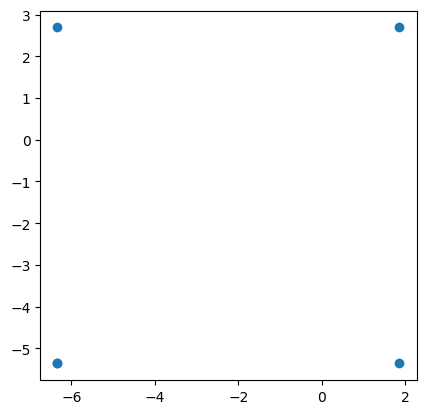

In [6]:
gdf = gpd.read_file(output_filename)
gdf.plot()

In [7]:
gdf.explore()